<a href="https://colab.research.google.com/github/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/blob/develop/notebook/Colaboratory/microarray2021S-2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# マイクロアレイ解析 \~2021 Spring Semester\~

- [程研HP](http://ui-tei.rnai.jp/)
- [実習wiki](http://ui-tei.rnai.jp/microarray/doku.php?id=2021)
- [`teilab` Package (Github)](https://github.com/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments)
- [`teilab` Documentation](https://iwasakishuto.github.io/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/index.html)

　今回の実習では、網羅的に遺伝子の発現を解析する手法である**マイクロアレイ**について、

- **wet(実験)**：siRNAを導入した細胞からRNAを抽出し、マイクロアレイ実験を行う。マイクロアレイの原理や操作手順を理解する。
- **dyr(解析)**：全mRNAの変動量を、マイクロアレイデータの特徴を踏まえて解析する。マイクロアレイデータの解析手法を理解する。

の両側面から学んでいただきますが、このNotebookでは、そのうち **dry(解析)** パートに関して、プログラミング言語 [Python](https://www.python.org/) を使って実際の解析の流れを、手を動かしながら学んでいただくことになります。

***
***

#### 一言

　今回dryパートの実習を担当させていただく、程研M1の岩崎（生情11期）です。よろしくお願いします。

　この実習が終わった時には、**全員が「マイクロアレイ解析結構Pythonでできるし、あんなことやこんなことも自分でプログラムを書いて調べてみたい！！」** と思っていただけることを目指して頑張りますので、わからないことがあればなんでも遠慮なく質問してください！！

　また、**「解析手法に絶対はない」** ので、是非積極的に色々な解析を試みて、面白い結果を出してきてください！！！（ぜひ一緒に議論しましょう！）

***
***

## 0. 環境構築

　それでは解析を始めていきましょう！！解析に必要なデータや、各種ツールを揃えていきます。といっても、必要なプログラムはまとめて[パッケージ化しておいた](https://github.com/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments)ので、以下のコードを実行するだけで全て揃います。

### 0.1 必要なツールの準備

In [ ]:
! pip install "git+https://github.com/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments.git" --ignore-requires-python

  Cloning https://github.com/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments.git to /tmp/pip-req-build-11ugvk63
  Running command git clone -q https://github.com/iwasakishuto/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments.git /tmp/pip-req-build-11ugvk63
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 1.5MB/s 
     |████████████████████████████████| 9.9MB 7.2MB/s 
     |████████████████████████████████| 13.2MB 44.0MB/s 
     |████████████████████████████████| 15.3MB 229kB/s 
     |████████████████████████████████| 10.3MB 33.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for teilab: filename=teilab-0.1.0-cp37-none-any.whl size=50333 sha256=64072d728896d370a2c118dcb2a264b958d2f10e82d3114e51dd36ab4d6b9d5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkhrdvzi

ここで

```
ERROR: XXX has requirement YYY==<version> but you'll have YYY <version> which is incompatible.
WARNING: The following packages were previously imported in this runtime
```

のようなエラーが出る分には（確認する限り、今回の実習では）問題ありません。

　ただ、以下のようなメッセージが出ると思うので、言われた通りにruntimeをrestartしましょう。

```
WARNING: The following packages were previously imported in this runtime:
  [matplotlib,mpl_toolkits,numpy,pandas]
You must restart the runtime in order to use newly installed versions.
```

In [ ]:
# 以下のコマンドでエラーが出なければ、準備はOKです！
from teilab.question import ask
ret = ask(
    text="好きな言葉を入力してください。", 
    username="あなたの名前", 
    icon_emoji=":grinning:", 
    icon_url=None, 
    webhook_url=None,
)
ret.ok

True

　以上で必要なツールは揃いました！！それでは以下で必要なデータのダウンロードを行いましょう！！

### 0.1 必要なデータの準備

　続いて、データの準備に取り掛かります。先ほどインストールしたパッケージを用いてデータのダウンロードを行います。

In [ ]:
# データのダウンロードを取り扱うクラスを定義したので、これを用いて煩わしい作業を省きます。（非本質なので）
from teilab.datasets import TeiLabDataSets
dataset = TeiLabDataSets()

There are not enough datasets. Use ``.get_data`` to prepare all the required datasets.


In [ ]:
password1 = "microarray2020A"
password2 = "microarray2021S"
password3 = "microarray2021S-sup"

In [ ]:
path1 = dataset.get_data(password=password1)
path2 = dataset.get_data(password=password2)
path3 = dataset.get_data(password=password3)

Try to get data from https://drive.google.com/u/0/uc?export=download&confirm=bPRo&id=1xUCG7WZWHFmWFRy0OjgJr_-GKCSJrv2C
This is published data :)
[Download] URL: https://drive.google.com/u/0/uc?export=download&confirm=bPRo&id=1xUCG7WZWHFmWFRy0OjgJr_-GKCSJrv2C
* Content-Encoding : gzip
* Content-Length   : 0.0 [B]
* Content-Type     : text/html
* Save Destination : /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2020A.gz


3261it [00:11, 294.74it/s, Downloaded=101.9 [MB]]


[Unzip] Show file contents:
	* 実習解析用データ/
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_2_1.pdf
	* __MACOSX/
	* __MACOSX/実習解析用データ/
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_2_1.pdf
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_1_3.txt
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_1_3.txt
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_1_2.txt
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_1_2.txt
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_2_2.pdf
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_2_2.pdf
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_1_1.txt
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_1_1.txt
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_2_3.pdf
	* __MACOSX/実習解析用データ/._US91503671_253949442637_S01_GE1_105_Dec08_2_3.pdf
	* 実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_1_4.txt
	* __MACOSX/実習解析用データ/._US91503671_25

In [ ]:
path3 = dataset.get_data(password=password3)

Try to get data from https://www.dropbox.com/sh/swzqvs3ly1b64k7/AADBQIlj9hidiDmW0YDYYjVVa?dl=1
The correspondence between "ProbeName" and "GeneName" is described in "072363_D_AA_20200924.txt"
[Download] URL: https://www.dropbox.com/sh/swzqvs3ly1b64k7/AADBQIlj9hidiDmW0YDYYjVVa?dl=1
* Content-Encoding : None
* Content-Length   : 28.7 [MB]
* Content-Type     : application/zip
* Save Destination : /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S-sup.zip
===== Progress =====
microarray2021S-sup.zip	100.0%[####################] 1.6[s] 17.8[MB/s] eta -0.0[s]
[Unzip] Show file contents:
	* /
	* sample_list.txt
	* sample_list_LNA.txt
	* 072363_D_AA_20200924.txt
	* SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.pdf
	* SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.pdf
	* SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.pdf
	* SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.pdf
	* SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.pdf
Saved data at /usr/local/lib/python3.7/dist-pa

In [ ]:
print(path1)
print(path2)
print(path3)

/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2020A
/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S
/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S-sup


## 1. Pythonについて(Playground)

　Pythonを使うのが初めて、と言う方もいらっしゃると思うので、ここで簡単に説明します。

なお、[東大の数理・情報教育研究センターが提供している入門講座](https://utokyo-ipp.github.io/)が非常に質が良いと評判なので、詳しくはそちらを参照してください。

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
help(ask)

Help on function ask in module teilab.question:

ask(text: str, username: Union[str, NoneType] = None, icon_url: Union[str, NoneType] = None, icon_emoji: Union[str, NoneType] = None, fallback: Union[str, NoneType] = None, pretext: Union[str, NoneType] = None, attachment_text: Union[str, NoneType] = None, color: str = 'good', fields_title: str = '', fields_value: str = '', fields_short: bool = True, webhook_url: Union[str, NoneType] = None) -> requests.models.Response
    Send a question anonymously to Author's Slack using `Incoming Webhook <https://slack.com/help/articles/115005265063-Incoming-webhooks-for-Slack>`_
    
    Args:
        text (str)                                : Message.
        username (Optional[str], optional)        : User name. Defaults to ``None`` .
        icon_url (Optional[str], optional)        : Image url for Bot Icon. Defaults to ``None`` .
        icon_emoji (Optional[str], optional)      : Emoji for Bot Icon. Defaults to ``None`` .
        fallback (Opt

Document: https://iwasakishuto.github.io/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/teilab.question.html#teilab.question.ask

In [ ]:
ask(text="ぴえん", username="JK", icon_emoji=":pleading_face:")

<Response [200]>

In [ ]:
ask(text="こんにちは", username="浅野 吉政", icon_url="http://ui-tei.rnai.jp/assets/images/asano3.jpg")

<Response [200]>

In [ ]:
dataset.__dir__()

In [ ]:
dir(dataset)

Document: https://iwasakishuto.github.io/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/teilab.datasets.html#teilab.datasets.TeiLabDataSets

In [ ]:
arr = np.asarray([1,2,3,4,5])
print(arr)

[1 2 3 4 5]


In [ ]:
arr[:-2]

array([1, 2, 3])

In [ ]:
arr[1:]

In [ ]:
df = pd.DataFrame(data=[
  [1,2,3,4,5],
  [6,7,80,9,10]
], columns=["A","","C","D","P"])
df.head()

,A,,C,D,P
0,1,2,3,4,5
1,6,7,80,9,10


In [ ]:
df[["D"]]

,D
0,4
1,9


In [ ]:
df[["D","C"]]

,D,C
0,4,3
1,9,80


In [ ]:
df.E

0     5
1    10
Name: E, dtype: int64

## 2. データの読み込み

　それでは、ダウンロードしたデータを読み込んでいきます。

In [ ]:
# どこにデータがあるかの確認
dataset.filePaths

array([PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2020A/実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_2_1.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2020A/実習解析用データ/US91503671_253949442637_S01_GE1_105_Dec08_2_3.txt'),
    

In [ ]:
# 読み込まれたデータの内容を可視化する。
dataset.samples.show_groups()

  idx  Condition              gn  GroupName                              FileName
-----  -------------------  ----  -------------------------------------  ---------------------------------------------------
    0  mock                    0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt
    1  siVIM-270               0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt
    2  siVIM-270(2'OMe2-5)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt
    3  siVIM-270(2'OMe6-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt
    4  siVIM-270(2'OMe2-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt
    5  mock(1)                 1  US91503671_253949442637_S01_GE1_105    US91503671_253949442637_S01_GE1_105_Dec08_2_1.txt
    6  siVIM-270(LNA3-5)       1  US91503671_

In [ ]:
# データの中身を確認。
! head -n20 {dataset.filePaths[0]}

TYPE	text	text	text	integer	text	float	float	text	integer	text	text	integer	integer	integer	integer	float	float	float	float	float	float	text	text	text	text	text	text	text	text	text	text	text	integer	integer	integer	text	integer	boolean
FEPARAMS	Protocol_Name	Protocol_date	Scan_ScannerName	Scan_NumChannels	Scan_Date	Scan_MicronsPerPixelX	Scan_MicronsPerPixelY	Scan_OriginalGUID	Scan_NumScanPass	Grid_Name	Grid_Date	Grid_NumSubGridRows	Grid_NumSubGridCols	Grid_NumRows	Grid_NumCols	Grid_RowSpacing	Grid_ColSpacing	Grid_OffsetX	Grid_OffsetY	Grid_NomSpotWidth	Grid_NomSpotHeight	Grid_GenomicBuild	FeatureExtractor_Barcode	FeatureExtractor_Sample	FeatureExtractor_ScanFileName	FeatureExtractor_ArrayName	FeatureExtractor_ScanFileGUID	FeatureExtractor_DesignFileName	FeatureExtractor_ExtractionTime	FeatureExtractor_UserName	FeatureExtractor_ComputerName	FeatureExtractor_Version	FeatureExtractor_IsXDRExtraction	FeatureExtractor_ColorMode	FeatureExtractor_QCReportType	DyeNorm_NormFilename	DyeNorm_NormN

In [ ]:
# 読み込み方
df = pd.read_csv(filepath_or_buffer=dataset.filePaths[0], sep="\t", header=9)
df.head(3)

,FEATURES,FeatureNum,Row,Col,SubTypeMask,ControlType,ProbeName,SystematicName,PositionX,PositionY,gProcessedSignal,gProcessedSigError,gMedianSignal,gBGMedianSignal,gBGPixSDev,gIsSaturated,gIsFeatNonUnifOL,gIsBGNonUnifOL,gIsFeatPopnOL,gIsBGPopnOL,IsManualFlag,gBGSubSignal,gIsPosAndSignif,gIsWellAboveBG,SpotExtentX,gBGMeanSignal
0,DATA,1,1,1,260,1,GE_BrightCorner,GE_BrightCorner,697.237,401.288,221432.400000,22143.240000,227001.0,31.0,6.037018,0,0,0,0,1,0,226487.00000,1,1,25.7804,31.3989
1,DATA,2,1,2,66,1,DarkCorner,DarkCorner,718.433,401.701,3.354572,3.364504,72.5,32.0,5.969753,0,0,0,0,1,0,-3.99340,0,0,26.8687,31.8721
2,DATA,3,1,3,66,1,DarkCorner,DarkCorner,739.793,401.293,3.388527,3.398559,71.0,32.0,6.184108,0,0,0,0,0,0,-5.38443,0,0,25.5572,32.2257


## 3. データの統合

　先日 Excel や R で行った解析と同様に、全サンプルのデータを一つにまとめていきましょう。

　行番号とプローブ番号の対応関係は（同じタイミングの実験であれば）どのサンプルも同じであるので、サンプル $X$ のデータの隣にサンプル $Y$ のデータを `concatenate` すれば1枚のワークシート（DataFrame）にまとまります。

　そこで、これを繰り返して全サンプルの `gProcessedSignal` の値を1つのテーブルにまとめていきましょう。

In [ ]:
dataset.filePaths[0:5]

array([PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt'),
       PosixPath('/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt')],
      dtype=object)

In [ ]:
dataset.samples.Condition[0:5]

array(['mock', 'siVIM-270', "siVIM-270(2'OMe2-5)", "siVIM-270(2'OMe6-8)",
       "siVIM-270(2'OMe2-8)"], dtype=object)

In [ ]:
# 今回は、0-4のデータを使います。
target_filepaths = dataset.filePaths[0:5]
target_conditions = dataset.samples.Condition[0:5]

for fp,cond in zip(target_filepaths, target_conditions):
  print(cond, fp)

mock /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt
siVIM-270 /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt
siVIM-270(2'OMe2-5) /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt
siVIM-270(2'OMe6-8) /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt
siVIM-270(2'OMe2-8) /usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S/SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt


### 3.1 アノテーションデータの読み込み

　各プローブ（スポット、フィーチャー）がどういうデータかを説明するデータを、ここでは **「アノテーションデータ」** と呼ぶことにします。なお、同じ実験（マイクロアレイの機械）であれば、この情報はサンプル間で統一されているので、同タイミングに行ったサンプル群の中から一つを適当に選んでそこから抽出します。

※ここで抽出する**アノテーションデータ**は、以下のカラムに書かれている内容です。

In [ ]:
USE_COLS_ANNO  = [
    "FeatureNum", "ControlType", "ProbeName", "SystematicName"
]


|column name|description|
|:-:|:-|
|`FeatureNum`|スポットの番号|
|`ControlType`|<ul><li>positive controlは `1`</li> <li>negative controlは `-1`</li><li>それ以外（解析で用いる）は `0`</li></ul>|
|`ProbeName`|プローブ名|
|`SystematicName`|遺伝子名|

In [ ]:
df_anno = pd.read_csv(filepath_or_buffer=target_filepaths[0], sep="\t", header=9, usecols=USE_COLS_ANNO)
df_anno.head(10)

,FeatureNum,ControlType,ProbeName,SystematicName
0,1,1,GE_BrightCorner,GE_BrightCorner
1,2,1,DarkCorner,DarkCorner
2,3,1,DarkCorner,DarkCorner
3,4,0,A_21_P0014386,A_21_P0014386
4,5,0,A_33_P3396872,NM_001105533
5,6,0,A_33_P3267760,ENST00000378463
6,7,0,A_32_P194264,NM_001008708
7,8,0,A_23_P153745,NM_006332
8,9,0,A_33_P3352837,A_33_P3352837
9,10,0,A_21_P0011260,ENST00000618272


### 3.2 シグナル値の読み込み

　続いて、各サンプルのシグナル強度( `gProcessedSignal` )のデータを取得します。

　なお、この時 `gIsWellAboveBG` が `0` のものは「（真の）シグナルがバックグラウンドのシグナルよりも低く、信頼できないデータである」ということを意味するため、取り除きます。

In [ ]:
USE_COLS_SYGNAL = [
    "gProcessedSignal", "gIsWellAboveBG"
]

|column name|description|
|:-:|:-|
|`gProcessedSignal`|green(Cy-3)のシグナル強度（＝発現量）|
|`gIsWellAboveBG`|（真の）シグナルがバックグラウンドのシグナルより十分高いか？（＝信頼できるデータか）|

In [ ]:
df_signal = pd.read_csv(filepath_or_buffer=target_filepaths[0], sep="\t", header=9, usecols=USE_COLS_SYGNAL)
df_signal.head(10)

,gProcessedSignal,gIsWellAboveBG
0,221432.400000,1
1,3.354572,0
2,3.388527,0
3,10.799070,0
4,3.450608,0
5,13.351660,0
6,2894.362000,1
7,36836.570000,1
8,3.554870,0
9,3.673372,0


In [ ]:
df_signal[df_signal.gIsWellAboveBG == 1]

,gProcessedSignal,gIsWellAboveBG
0,221432.40000,1
6,2894.36200,1
7,36836.57000,1
12,64.05411,1
14,11815.76000,1
...,...,...
62967,142.48090,1
62968,21.86688,1
62969,3524.82100,1
62974,212748.40000,1


In [ ]:
# for文で回して0-4全てのデータを読み込みましょう。
df_combined = df_anno.copy(deep=True)
index = set(df_combined.index)
print(f"データ数(before): {len(df_combined)}")

for fp,cond in zip(target_filepaths, target_conditions):
  df_signal = pd.read_csv(fp, sep="\t", header=9, usecols=USE_COLS_SYGNAL)
  index = index & set(df_signal[(df_signal.gIsWellAboveBG==1)].index)
  df_combined = pd.concat([df_combined, df_signal[["gProcessedSignal"]].rename(columns={"gProcessedSignal" : cond})], axis=1)

df_filtered_1 = df_combined.loc[index, :]
print(f"データ数(after) : {len(df_filtered_1)}")

データ数(before): 62976
データ数(after) : 28824


In [ ]:
df_filtered_1.head()

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8)
0,1,1,GE_BrightCorner,GE_BrightCorner,221432.40000,199347.90000,192879.60000,194686.20000,157843.70000
6,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700
7,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000
12,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294
14,15,0,A_23_P208706,NM_138764,11815.76000,11092.96000,8431.17800,8500.06100,6113.43000


In [ ]:
# df_signal[(df_signal.gIsWellAboveBG==1)].index

　また、`ControlType` の値が $\pm1$ のものはコントロールであるため、`0` のもののみ取り出します。

In [ ]:
print("データ数(before):", len(df_filtered_1))
df_filtered_2 = df_filtered_1[df_filtered_1.ControlType == 0]
print("データ数(after) :", len(df_filtered_2))

データ数(before): 28824
データ数(after) : 28437


In [ ]:
# インデックスを振り直す。
df_filtered = df_filtered_2.reset_index(drop=True)
df_filtered.head(5)

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8)
0,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700
1,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000
2,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294
3,15,0,A_23_P208706,NM_138764,11815.76000,11092.96000,8431.17800,8500.06100,6113.43000
4,18,0,A_24_P333494,NM_018994,1841.13400,1882.83800,1593.41300,1881.09100,1628.77000


In [ ]:
df

,A,,C,D,P
0,1,2,3,4,5
1,6,7,80,9,10


### 3.3 アノテーションデータの追加

　このままだと `GeneName` がわからないので、その列を追加します。

In [ ]:
import os

In [ ]:
path3

'/usr/local/lib/python3.7/dist-packages/teilab/data/microarray2021S-sup'

In [ ]:
os.listdir(path3)

['SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.pdf',
 'SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.pdf',
 'sample_list_LNA.txt',
 'SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.pdf',
 'SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.pdf',
 'SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.pdf',
 'sample_list.txt',
 '072363_D_AA_20200924.txt']

In [ ]:
df_correspondence = pd.read_csv(os.path.join(path3, "072363_D_AA_20200924.txt"), sep="\t", usecols=["ProbeID", "GeneSymbol"])
df_correspondence.head(3)

,ProbeID,GeneSymbol
0,A_23_P421175,FAM83H
1,A_23_P392076,STRN3
2,A_22_P00016358,SLC8A1-AS1


In [ ]:
df_filtered = pd.merge(
    left=df_filtered, 
    right=df_correspondence, 
    left_on="ProbeName", 
    right_on="ProbeID", 
    how="left"
)
df_filtered.head(3)

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol
0,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700,A_32_P194264,CHAC2
1,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000,A_23_P153745,IFI30
2,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294,A_24_P944991,SREK1IP1


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28437 entries, 0 to 28436
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FeatureNum           28437 non-null  int64  
 1   ControlType          28437 non-null  int64  
 2   ProbeName            28437 non-null  object 
 3   SystematicName       28437 non-null  object 
 4   mock                 28437 non-null  float64
 5   siVIM-270            28437 non-null  float64
 6   siVIM-270(2'OMe2-5)  28437 non-null  float64
 7   siVIM-270(2'OMe6-8)  28437 non-null  float64
 8   siVIM-270(2'OMe2-8)  28437 non-null  float64
 9   ProbeID              28437 non-null  object 
 10  GeneSymbol           24281 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.6+ MB


In [ ]:
# 欠損値の処理をする。
df_filtered["ProbeID"]    = df_filtered["ProbeID"].fillna("Not Found")
df_filtered["GeneSymbol"] = df_filtered["GeneSymbol"].fillna("unknown")
df_filtered.head(3)

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol
0,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700,A_32_P194264,CHAC2
1,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000,A_23_P153745,IFI30
2,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294,A_24_P944991,SREK1IP1


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
# df_filtered.to_excel("microarray_filtered.xlsx", index=False)

In [ ]:
df_filtered

In [ ]:
! ls drive

MyDrive


***
```python
# データをGoogleDriveに保存したい場合は、以下のコードを走らせてください。
from google.colab import drive
drive.mount('/content/drive')
df_filtered.to_excel("microarray_filtered.xlsx", index=False)
```
***

## 4. データの前処理

　無事にデータがダウンロードできたので、実験上のバイアス等を取り除くためにデータの前処理を行います。（ここでは省略します。）

In [ ]:
df_filtered.columns

Index(['FeatureNum', 'ControlType', 'ProbeName', 'SystematicName', 'mock',
       'siVIM-270', 'siVIM-270(2'OMe2-5)', 'siVIM-270(2'OMe6-8)',
       'siVIM-270(2'OMe2-8)', 'ProbeID', 'GeneSymbol'],
      dtype='object')

## 5. 可視化

　`matplotlib` や `plotly` などを用いて、解析結果を可視化します。

In [ ]:
X = [1,2,3, 4, 5, 6, 7, 8, 9, 10]
Y = [1,4,9,16,25,36,49,64,81,100]

### 5.1 `matplotlib`

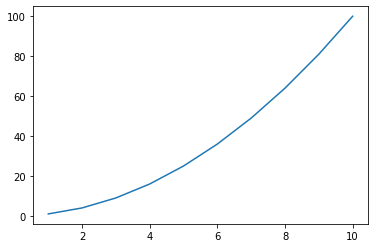

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,Y)

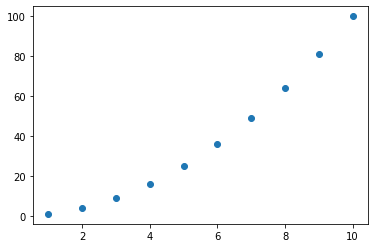

In [ ]:
plt.scatter(X,Y)


### 5.2 `plotly`

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
px.line(x=X,y=Y, width=400, height=300)

In [ ]:
px.scatter(x=X, y=Y, width=400, height=300)

## 6. 解析

　ここでは、XYプロットとMAプロットを図示し、シグナル強度の分布を調べます。

In [ ]:
df_filtered.head(3)

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol
0,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700,A_32_P194264,CHAC2
1,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000,A_23_P153745,IFI30
2,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294,A_24_P944991,SREK1IP1


In [ ]:
df_filtered["siVIM-270"].values

array([3.003695e+03, 3.637294e+04, 5.348488e+01, ..., 1.225478e+02,
       1.634233e+01, 1.909255e+03])

### 6.1 X-Y プロット

- サンプル $X$ の `gProcessedSignal` （$\log_2(\text{gProcessedSignal})$） の値を横軸
- サンプル $Y$ の `gProcessedSignal` （$\log_2(\text{gProcessedSignal})$） の値を縦軸

にプロットしたものを **X-Yプロット** と呼びます。

In [ ]:
np.log2(df_filtered["mock"].values)

array([11.49902966, 15.16885111,  6.00121924, ...,  7.15462472,
        4.45067548, 11.78333428])

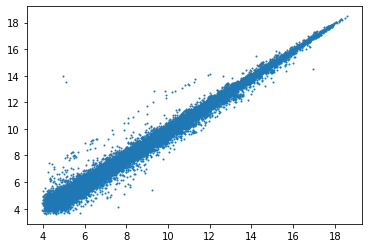

In [ ]:
plt.scatter(
    x=np.log2(df_filtered["mock"]), 
    y=np.log2(df_filtered["siVIM-270"]),
)

In [ ]:
df_filtered[df_filtered["GeneSymbol"] == "VIM"]

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol
27201,60373,0,A_23_P161190,NM_003380,128840.8,23481.58,23431.72,18476.52,25521.46,A_23_P161190,VIM


### 6.2 MAプロット

- $log_2(Y/X)$ を縦軸 (Minus)
- $log_{10}(XY)$ を横軸 (Average)

にプロットしたものを **M-Aプロット** と呼びます。

In [ ]:
x = df_filtered["mock"].values
y = df_filtered["siVIM-270"].values

In [ ]:
# df_vim = df_filtered[df_filtered["GeneSymbol"]=="VIM"]
# df_vim

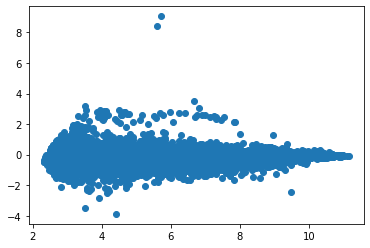

In [ ]:
x = df_filtered["mock"].values
y = df_filtered["siVIM-270"].values
plt.scatter(
    x=np.log10(x*y),
    y=np.log2(y/x),
)

## 7. 発展

　より良いデータ解析のためには、以下のことが欠かせません。

- プローブのSummarization
- サンプル間のNormalization
- サンプルのSummarization

## 7. 特定の塩基配列を持つ遺伝子の発現量の変化を調べる

　入力した配列を3'UTRにもつ遺伝子（アクセッション番号）のリストを表示するページ（[seedmatch](http://atlas.RNAi.jp/seedmatch/)）を用いて、特定の配列を3'UTRに持つ遺伝子群を見てみましょう。

### 7.1 シード領域と相補的な配列を持つ遺伝子について調べる

siRNAのガイド鎖の5'末端から2-8塩基目の7塩基（シード領域と呼ばれます。今回は `UGAACUC`）と相補的な配列（`GAGTTCA`）を3'UTRにもつmRNAsを検索してみましょう。

In [ ]:
# seedmatchで検索したデータと紐付ける。
df_is_matched = pd.merge(df_filtered, df_matched_mRNAs, on="SystematicName", how="left").fillna(0)
df_is_matched.head(3)

,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol,NumHits
0,7,0,A_32_P194264,NM_001008708,2894.36200,3003.69500,2711.62200,2991.08900,2597.48700,A_32_P194264,CHAC2,0.0
1,8,0,A_23_P153745,NM_006332,36836.57000,36372.94000,32831.89000,36108.64000,33039.81000,A_23_P153745,IFI30,0.0
2,13,0,A_24_P944991,NM_173829,64.05411,53.48488,53.25852,67.57403,67.96294,A_24_P944991,SREK1IP1,1.0


In [ ]:
# 累積度数曲線を描くために、ソートする。
df_is_matched["log2(RNA/mock)"] = np.log2(df_is_matched["siVIM-270"]/df_is_matched["mock"])
df_is_matched = df_is_matched.sort_values(by="log2(RNA/mock)").reset_index(drop=False)
df_is_matched.head(3)

,index,FeatureNum,ControlType,ProbeName,SystematicName,mock,siVIM-270,siVIM-270(2'OMe2-5),siVIM-270(2'OMe6-8),siVIM-270(2'OMe2-8),ProbeID,GeneSymbol,NumHits,log2(RNA/mock)
0,8370,18885,0,A_21_P0014513,ENST00000518570,610.3906,41.32947,41.46609,46.29550,29.80138,A_21_P0014513,unknown,0.0,-3.884490
1,4580,10498,0,A_33_P3397716,ENST00000355837,195.2470,17.37097,24.58954,20.62478,28.07602,A_33_P3397716,unknown,0.0,-3.490550
2,12475,27990,0,A_33_P3219245,NR_023390,238.7709,34.05103,36.50751,38.06785,42.29378,A_33_P3219245,LINC00476,0.0,-2.809857


In [ ]:
y = [i/len(df_is_matched) for i in range(len(df_is_matched))]
x = df_is_matched["log2(RNA/mock)"].values

### 7.2 さらに遊んでみる。



　ここから先は、みなさんが興味を持った点について、思う存分データで遊んでいただく時間です。

- マッチするシードの数（`NumHits`）って、多い方が抑制されてる？？
- そもそもなんで2-8の7merでオフターゲット効果が起きるの？？
  - 1-7や3-9は？？
  - 6merや9merは？？
  - Argonauteタンパク質と結合（loading）し、RISC(RNA induced silencing complex)を形成するが、構造的に…
- 統計的に有意だと言える？？

面白そうなことについては、積極的に調べて見てください！！

※ 以下に、使えそうなツールを用意しておきました。ぜひ解析に役立ててください！！

In [ ]:
from teilab.seedmatch import get_matched_mRNAs

In [ ]:
df_matched_mRNAs = get_matched_mRNAs("GTTGATG")
df_matched_mRNAs.head(5)

,SystematicName,NumHits
0,NM_001013628,2
1,NM_001105520,1
2,NM_001146041,1
3,NM_001134657,1
4,NM_001134659,1
